In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import sem, probplot, norm
from sklearn.utils import resample
import os
import statsmodels

In [2]:
# Use root for analysis, instead of notebooks folder. 
# WARNING: Only run this once!
print("Current WD:", os.getcwd())
path_parent = os.path.dirname(os.getcwd())
os.chdir(path_parent)
print("Analysis WD:", os.getcwd())

Current WD: c:\Users\jeffc\source\repos\python-code-snippets\notebooks
Analysis WD: c:\Users\jeffc\source\repos\python-code-snippets


In [57]:
color_theme = {
    'blue': "#74B5CF",
    'darkblue': "#37A6D2",
    'purple': "#C788CF",
    'green': "#9ACF69",
    'orange': "#CF9A5F",
    'gray': "#3a3a3c"
}

# Random Sampling
- Sample: A subset from a larger data set
- Population: The full data set
- N: The size of the population
- Random Sampling: Retreiving individual records randomly from the population
- Stratified Sampling: Dividing up the population, then randomly sampling from those strata

In [7]:
df = pd.read_csv("data/raw/ga_sevendaysessions.csv")
samp = df.sample(1000)

print("Time On Page - Population Mean: ", df["ga_timeonpage_sec"].mean())
print("Time On Page - Sample Mean: ", samp["ga_timeonpage_sec"].mean())

Time On Page - Population Mean:  237.8915
Time On Page - Sample Mean:  195.399


# Selection Bias
- Selection Bias: Bias resulting from the way observations are selected
- Data snooping: Extensive hunting through data in search of something interesting
- Vast Search Effect: Bias or nonreproducible results from searching too many ways/too many iterations

# Sampling Distribution of a Statistic
- Sample Statistic: A metric calculated from a sample (example: mean)
- Data distribution: Frequency Distribution of individual values in a dataset
- Sampling Distribution: Frequency distribution of a sample statistic over many samples/resamples
- Central Limit Theorem: Tendency for sample statistics to take normal distribution shape
- Standard Error: Variability of a sample statistic over many samples

Standard Error: 1.1833490816356698


Text(0, 0.5, 'Avg Time on Page')

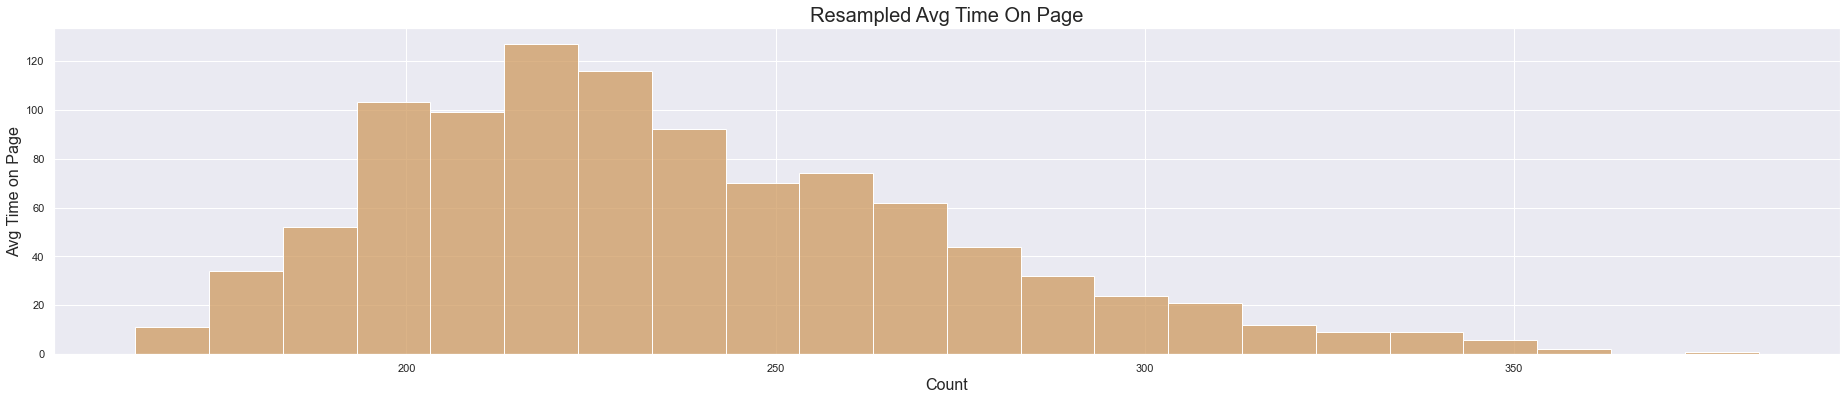

In [28]:
vals = []
for i in range(1000):
    # sample without replacement
    vals.append(df.sample(1000)["ga_timeonpage_sec"].mean())

print("Standard Error:", sem(vals))

sns.set(rc={'figure.figsize':(32,6)})
plot = sns.histplot(data=vals, color=color_theme.get("orange"))
plot.set_title("Resampled Avg Time On Page", fontsize=20)
plot.set_xlabel("Count", fontsize = 16)
plot.set_ylabel("Avg Time on Page", fontsize = 16)


# Bootstrapping
- Bootstrap Sample: A sample taken with replacement
- Resampling: Process of taking repeated samples (as above, in the for loop)
- Bootstrapping vs. Resampling: 
    - Bootstrapping always with replacement
    - Resampling often includes permutation procedures and/or without replacement

In [29]:
# Pandas sample with replacement
boot = df.sample(n=1000, replace=True, random_state=1)

Text(0, 0.5, 'Avg Time on Page')

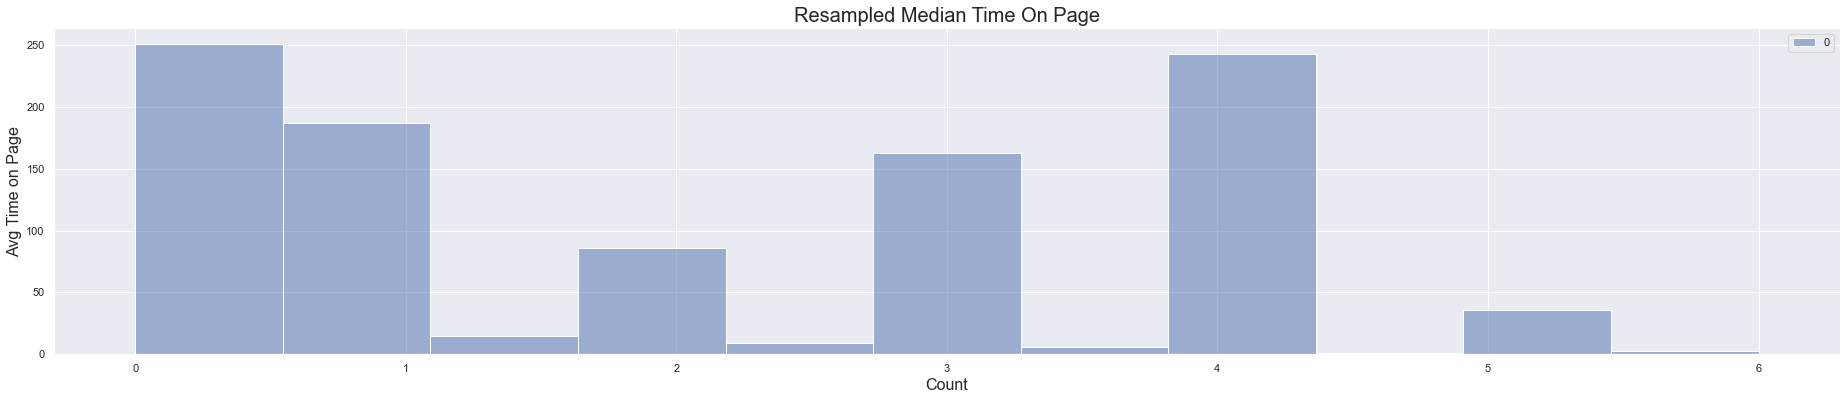

In [41]:
# sklearn Resample
resamp = []
for i in range(1000):
    resamp.append(resample(df["ga_timeonpage_sec"]).median())

resamp = pd.DataFrame(resamp)
sns.set(rc={'figure.figsize':(32,6)})
plot = sns.histplot(data=resamp, color=color_theme.get("darkblue"))
plot.set_title("Resampled Median Time On Page", fontsize=20)
plot.set_xlabel("Count", fontsize = 16)
plot.set_ylabel("Avg Time on Page", fontsize = 16)

In [39]:
print("Bootstrap stats...")
print(f'Original: {df["ga_timeonpage_sec"].median()}')
print(f'Bias: {resamp.mean() - df["ga_timeonpage_sec"].median()}')
print(f'Std. Error: {resamp.std()}')

Bootstrap stats...
Original: 2.0
Bias: 0    0.039
dtype: float64
Std. Error: 0    1.650971
dtype: float64


# Confidence Intervals
- Confidence Level: The percentage of conf
- Interval Endpoints: 

Standard Error: 1.1902326008062871


Text(0, 0.5, 'Avg Time on Page')

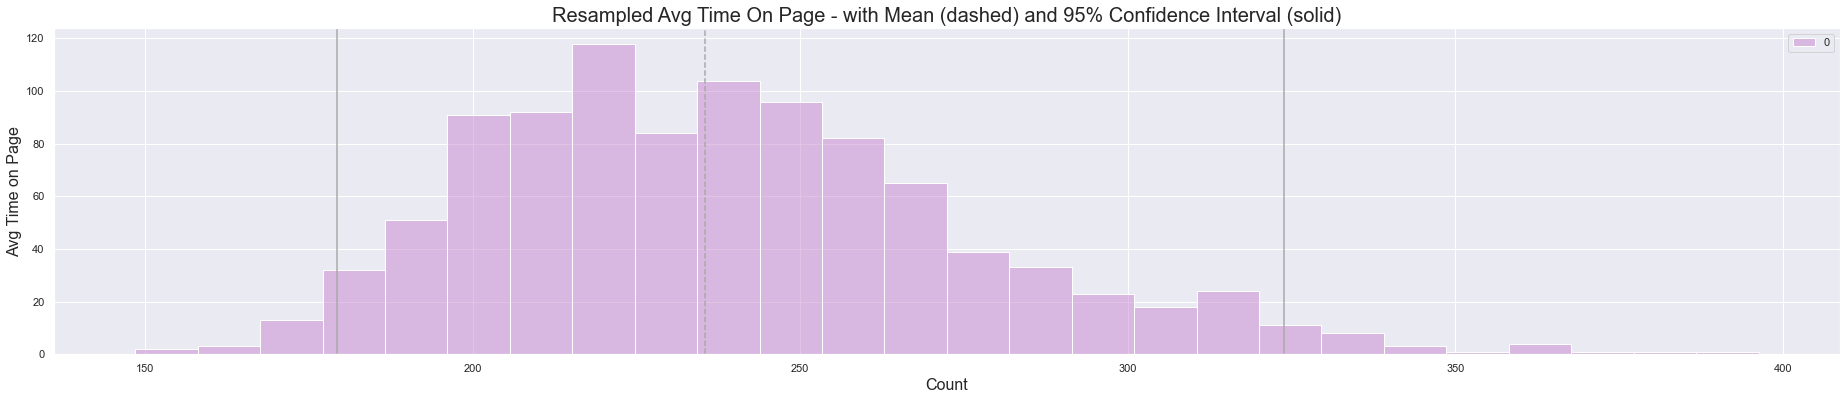

In [60]:
vals = []
for i in range(1000):
    # sample without replacement
    vals.append(df.sample(1000)["ga_timeonpage_sec"].mean())

print("Standard Error:", sem(vals))

vals = pd.DataFrame(vals)
sns.set(rc={'figure.figsize':(32,6)})
plot = sns.histplot(data=vals, palette=[color_theme.get("purple")])
plot.axvline(vals[0].quantile(q=0.025), color="darkgray")
plot.axvline(vals[0].quantile(q=0.50), color="darkgray", linestyle="dashed")
plot.axvline(vals[0].quantile(q=0.975), color="darkgray")
plot.set_title("Resampled Avg Time On Page - with Mean (dashed) and 95% Confidence Interval (solid)", fontsize=20)
plot.set_xlabel("Count", fontsize = 16)
plot.set_ylabel("Avg Time on Page", fontsize = 16)

# Normal Distribution
- Error: Difference between data point and a predicted or average value (aka: residuals)
- Standardize: Subtract the mean and divide by standard deviation
- z-score: The result of standardizing a single data point
- Standard Normal: A normal distribution with mean of 0 and standard deviation of 1.
- QQ-Plot: A plot to visualize how close a sample distribution is to a specified distribution (ie: the normal distribution)

Text(0, 0.5, 'Count')

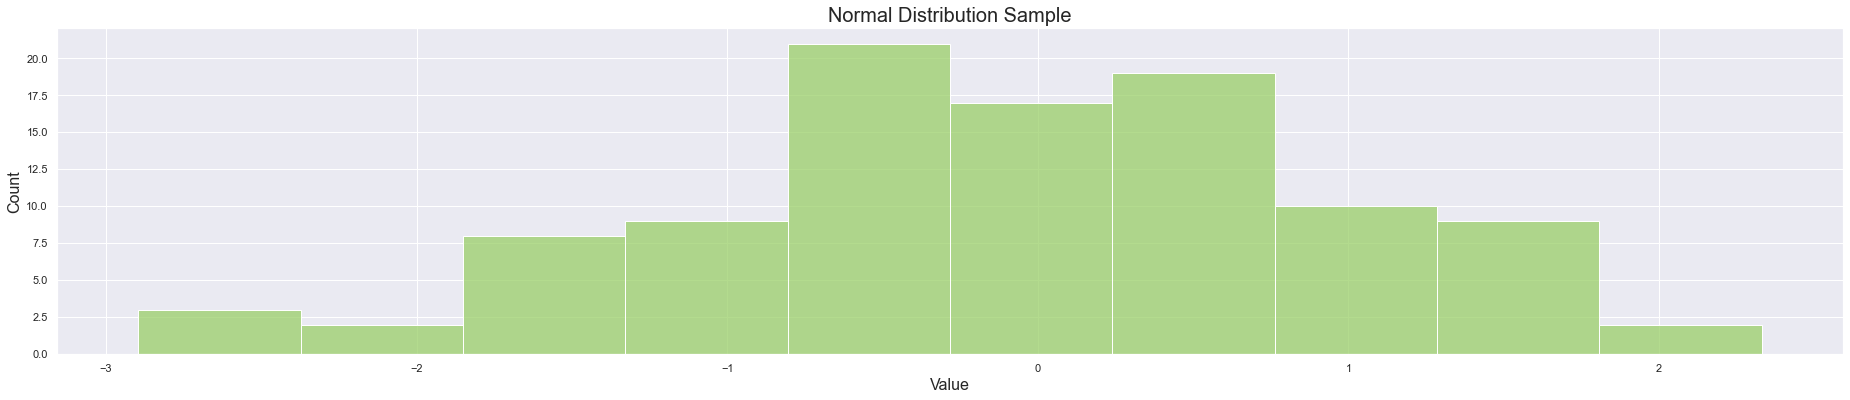

In [73]:
# Normal Distribution
fig, ax = plt.subplots(figsize=(32,6))
norm_sample = norm.rvs(size=100)

plot = sns.histplot(data=norm_sample, color=color_theme.get("green"))
plot.set_title("Normal Distribution Sample", fontsize=20)
plot.set_xlabel("Value", fontsize = 16)
plot.set_ylabel("Count", fontsize = 16)

((array([-2.46203784, -2.12570747, -1.93122778, -1.79044653, -1.67819304,
         -1.58381122, -1.50174123, -1.42869743, -1.36256869, -1.30191411,
         -1.24570419, -1.19317644, -1.14374949, -1.09696931, -1.05247413,
         -1.00997067, -0.96921765, -0.93001393, -0.89218993, -0.85560121,
         -0.82012357, -0.78564937, -0.75208458, -0.71934648, -0.68736185,
         -0.65606548, -0.62539893, -0.59530962, -0.56574992, -0.53667655,
         -0.50804994, -0.47983378, -0.45199463, -0.42450149, -0.39732558,
         -0.37044003, -0.34381966, -0.31744076, -0.29128096, -0.26531902,
         -0.23953472, -0.21390872, -0.18842244, -0.16305799, -0.13779803,
         -0.1126257 , -0.08752455, -0.06247843, -0.03747145, -0.01248789,
          0.01248789,  0.03747145,  0.06247843,  0.08752455,  0.1126257 ,
          0.13779803,  0.16305799,  0.18842244,  0.21390872,  0.23953472,
          0.26531902,  0.29128096,  0.31744076,  0.34381966,  0.37044003,
          0.39732558,  0.42450149,  0.

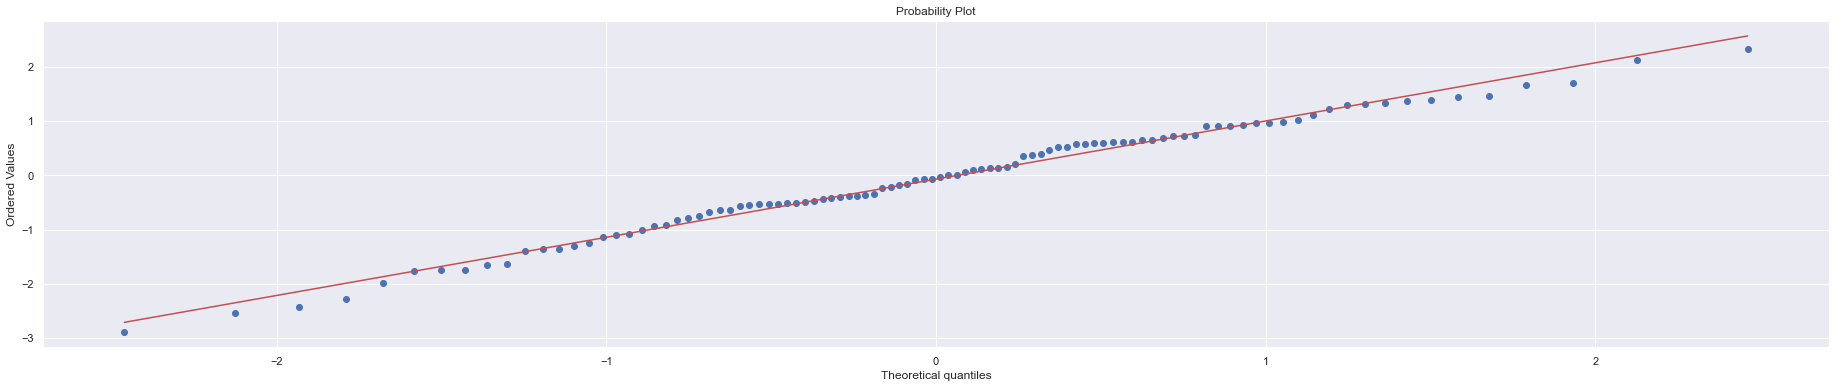

In [74]:
# QQ-Plot
# This is a good distribution of errors - not deviating far from the line. 
fig, ax = plt.subplots(figsize=(32,6))
probplot(norm_sample, plot=ax, )